In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### reading data

In [2]:
df=pd.read_csv("Automobile_data.csv")

In [3]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.shape # checking shape of the dataset

(205, 26)

In [5]:
df.isnull().sum() #looking for the null values in the dataset

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
df.symboling.unique() # loooking for unique value in our symbolling column

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

### Replacing the unwanted Symbol from Dataset

In [7]:
df[['price','normalized-losses']] = df[['price','normalized-losses']].replace("?", np.nan)
#dropna(inplace=True) # replaceing the unwanted symbols from the dataset

In [8]:
df.horsepower=df.horsepower.replace("?",0)

In [9]:
df[["engine-size","bore","stroke","peak-rpm"]]=df[["engine-size","bore","stroke","peak-rpm"]].replace("?",np.nan)

In [10]:
df["normalized-losses"]=df["normalized-losses"].astype("float64") #changing the type from object to Float

### Converting the datatype of obect-type to Integer/Float and imputing the missing value

In [11]:
df["engine-size"].fillna(int(df["engine-size"].mean()), inplace=True)

df["price"]=df["price"].astype("float64")

df["price"].fillna(int(df["price"].mean()),inplace=True)

df["bore"]=df["bore"].astype("float64")

df["bore"].fillna(int(df["bore"].mean()), inplace=True)

df["stroke"]=df["stroke"].astype("float64")

df["stroke"].fillna(int(df["stroke"].mean()), inplace=True)

df["peak-rpm"]=df["peak-rpm"].astype("float64")

df["peak-rpm"].fillna(int(df["peak-rpm"].mean()), inplace=True)

df["normalized-losses"].fillna(int(df["normalized-losses"].mean()),inplace=True)

In [12]:
df.isnull().sum() #cross validating for any null Values

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [13]:
df.info() # to get the datatype of the values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-

In [14]:
df.describe() # to look the dataset in statical view

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.323317,3.250439,10.142537,5125.365854,25.219512,30.751220,13207.126829
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.274676,0.315590,3.972040,476.979095,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.100000,8.600000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,6600.000000,49.000000,54.000000,45400.000000


### Data Visualization

### Make

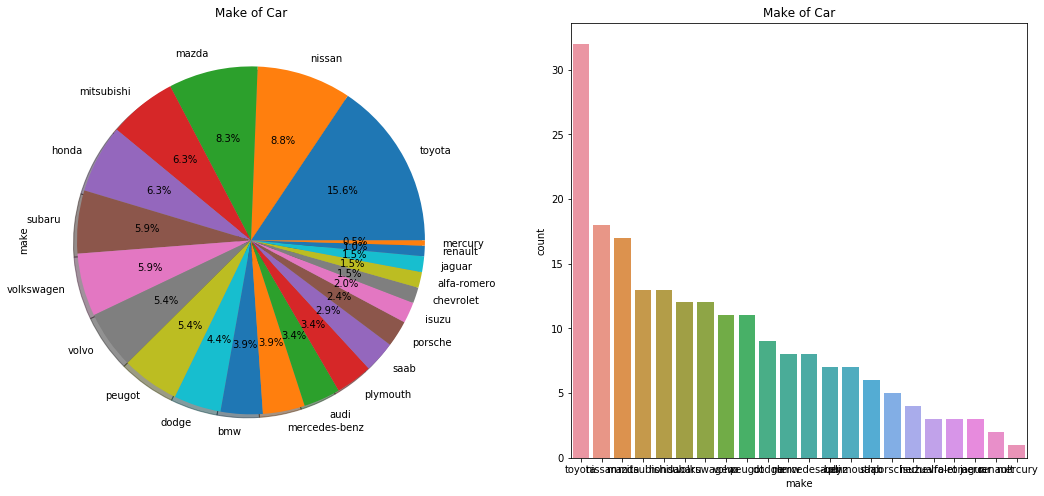

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['make'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Make of Car')
#ax[0].set_ylabel('Count')
sns.countplot('make',data=df,ax=ax[1],order=df['make'].value_counts().index)
ax[1].set_title('Make of Car')
#ax[1].set_xticklabels(rotation=30)
plt.show()

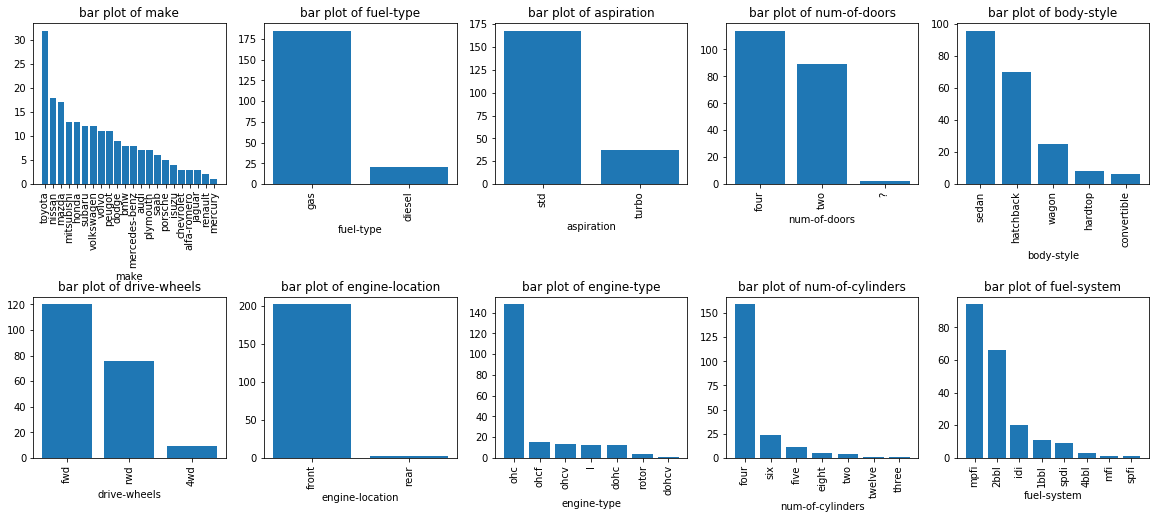

In [16]:
fig=plt.figure(figsize=(20, 8))
cat_cols=['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']
for i,j in zip(df[cat_cols].columns, range(10)):
    ax=fig.add_subplot(2,5,j+1)
    c2=df[i].value_counts()
    ax.bar(c2.index, c2)
    ax.set_title('bar plot of {}'.format(i))
    ax.set_xlabel(i)
    ax.set_xticklabels(c2.index,rotation=90)
plt.subplots_adjust(hspace=0.7)
plt.show()

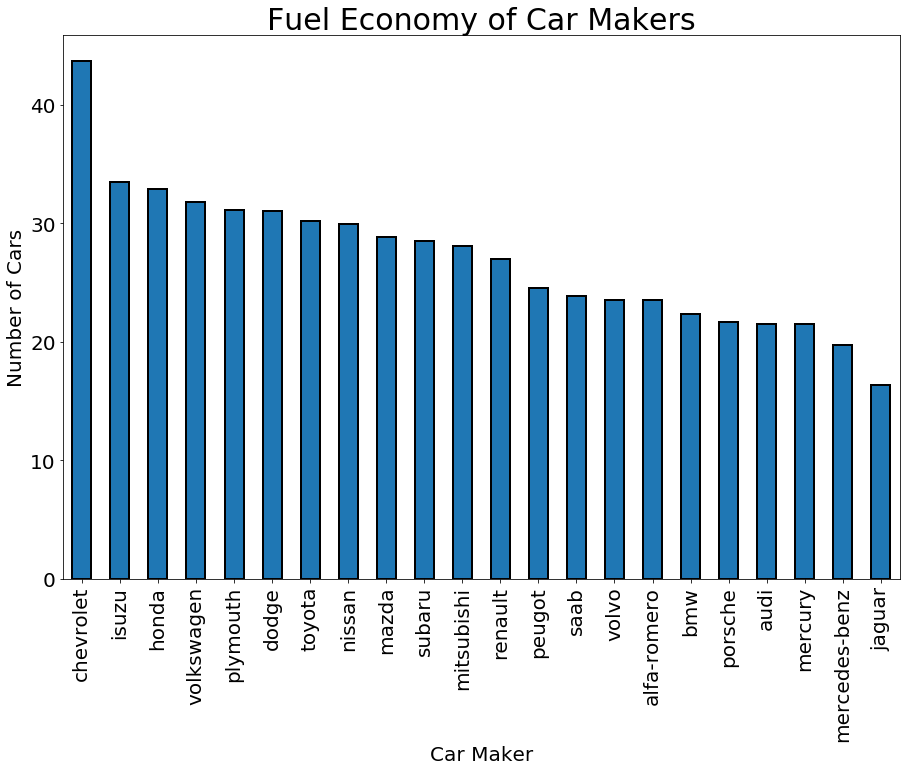

In [17]:
fig = plt.figure(figsize=(15, 10))
mileage=df.groupby(['make']).mean()
mileage['avg-mpg']=((mileage['city-mpg']+mileage['highway-mpg'])/2)
ax=mileage['avg-mpg'].sort_values(ascending=False).plot.bar(edgecolor='k',linewidth=2)
plt.xticks(rotation='vertical')
plt.xlabel('Car Maker',fontsize=20)
plt.ylabel('Number of Cars',fontsize=20)
plt.title('Fuel Economy of Car Makers',fontsize=30)
ax.tick_params(labelsize=20)
#plt.yticks(rotation='vertical')
plt.show()
plt.show()


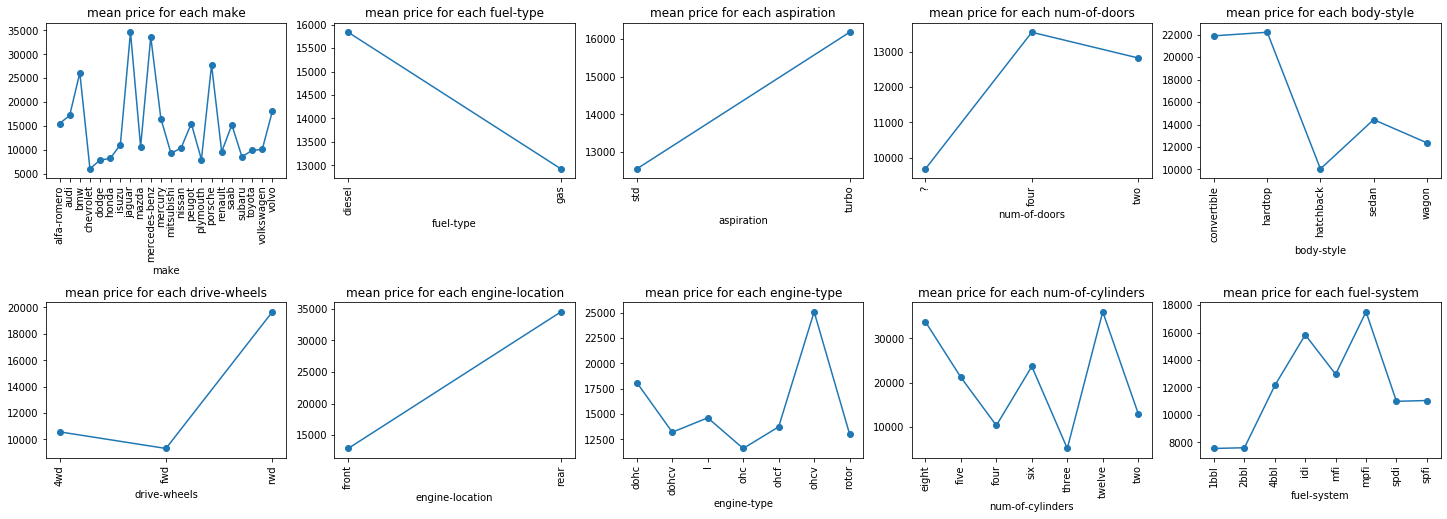

In [18]:
fig=plt.figure(figsize=(25, 8))
cat_cols=['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']
for i,j in zip(df[cat_cols].columns, range(10)):
    ax=fig.add_subplot(2,5,j+1)
    c1=pd.pivot_table(index=i, values='price', data=df, aggfunc='mean')
    ax.plot(c1.index, c1['price'])
    ax.scatter(c1.index, c1['price'])
    ax.set_title('mean price for each {}'.format(i))
    ax.set_xlabel(i)
    ax.set_xticklabels(c1.index,rotation=90)
plt.subplots_adjust(hspace=0.8)
plt.show()

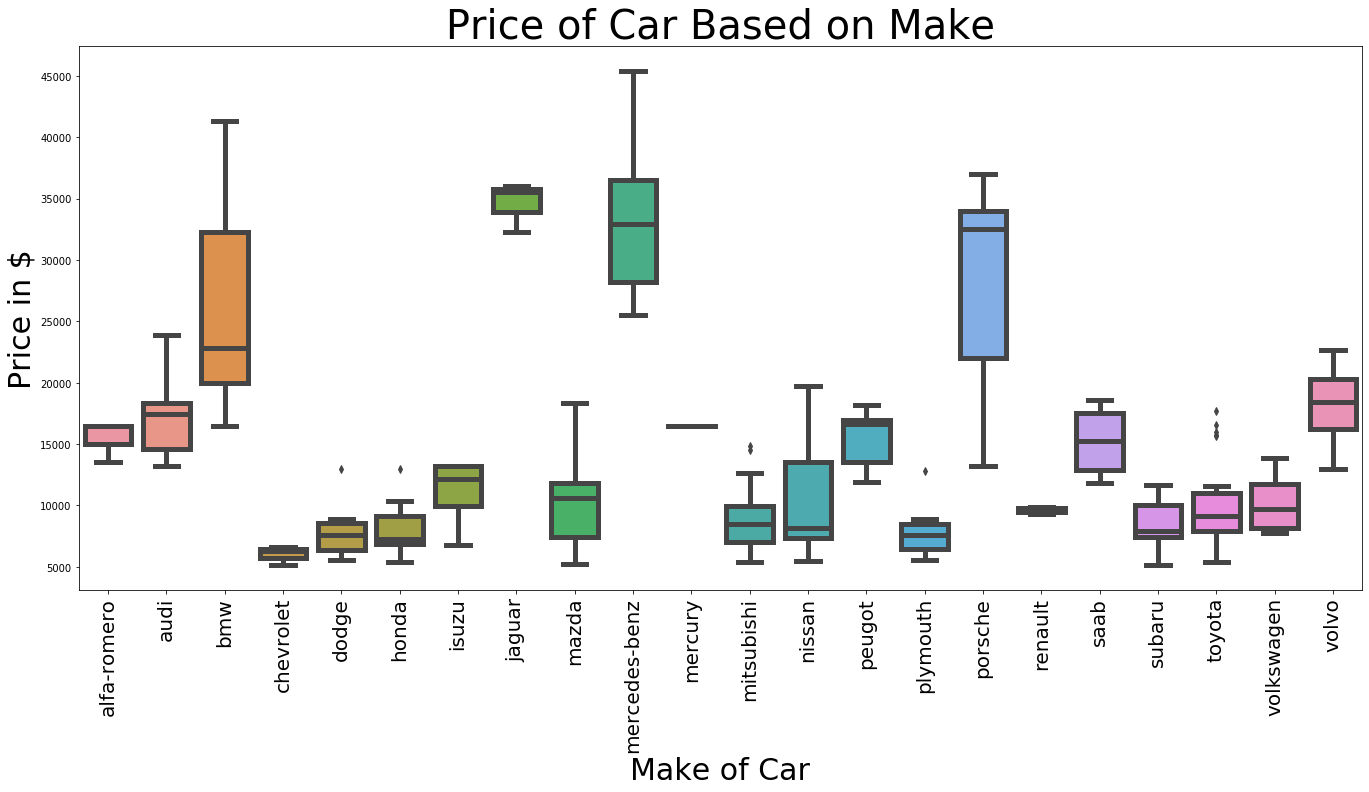

In [19]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=df,width=0.8,linewidth=5)
ax.set_xlabel('Make of Car',fontsize=30)
ax.set_ylabel('Price in $',fontsize=30)
plt.title('Price of Car Based on Make',fontsize=40)
ax.tick_params(axis='x',labelsize=20,rotation=90)

### Feature Engineering 

In [20]:
df.describe() #to check the mean ,standad deviation and other stastical features of numerical data

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.323317,3.250439,10.142537,5125.365854,25.219512,30.751220,13207.126829
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.274676,0.315590,3.972040,476.979095,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.100000,8.600000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,6600.000000,49.000000,54.000000,45400.000000


In [21]:
df.corr() # to check for colinearity/multicolinearity in data

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.169208,-0.036235,-0.178515,0.273678,-0.035823,0.034606,-0.082201
normalized-losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.049662,0.040556,-0.114525,0.237748,-0.218749,-0.178221,0.133999
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.495453,0.169037,0.249786,-0.360700,-0.470414,-0.544082,0.583168
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.607635,0.135199,0.158414,-0.287034,-0.670909,-0.704662,0.682986
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.553631,0.183321,0.181129,-0.219861,-0.642704,-0.677218,0.728699
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.208451,-0.028212,0.261214,-0.320599,-0.048640,-0.107358,0.134388
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.645962,0.172115,0.151362,-0.266282,-0.757414,-0.797465,0.820825
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.606408,0.222545,0.028971,-0.244600,-0.653658,-0.677470,0.861752
bore,-0.169208,-0.049662,0.495453,0.607635,0.553631,0.208451,0.645962,0.606408,1.000000,-0.036101,0.009529,-0.294375,-0.545879,-0.552307,0.525434
stroke,-0.036235,0.040556,0.169037,0.135199,0.183321,-0.028212,0.172115,0.222545,-0.036101,1.000000,0.187896,-0.095538,-0.021368,-0.025821,0.081954


In [22]:
#detecting outliers
for i in df.columns:
    if df[i].dtype!='object':
        print(i)
        mu=df[i].mean()
        st=df[i].std()
        cut_off=st * 3
        lower, upper=mu-cut_off, mu+cut_off
        print('number of outliers',len(df[(df[i]>upper)&(df[i]<lower)]))
        print('\n')

symboling
number of outliers 0


normalized-losses
number of outliers 0


wheel-base
number of outliers 0


length
number of outliers 0


width
number of outliers 0


height
number of outliers 0


curb-weight
number of outliers 0


engine-size
number of outliers 0


bore
number of outliers 0


stroke
number of outliers 0


compression-ratio
number of outliers 0


peak-rpm
number of outliers 0


city-mpg
number of outliers 0


highway-mpg
number of outliers 0


price
number of outliers 0




In [23]:
#for k in df.columns:
    #val=(df[k].size-df[k].count())
    #print("the number of missing valaues in {} is : {:.2f}".format(k,val))

In [24]:
#df["normalized-losses"]=="?"

In [25]:
#df.replace("?",0)

### Using Lasso Regresiion MOdel

In [26]:
df1=df

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-

In [28]:
df1.drop(columns=["city-mpg","engine-location"], axis=1 ) # droping columns

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000.0,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000.0,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000.0,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500.0,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500.0,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,109.1,188.8,...,four,141,mpfi,3.78,3.15,9.5,114,5400.0,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,109.1,188.8,...,four,141,mpfi,3.78,3.15,8.7,160,5300.0,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,109.1,188.8,...,six,173,mpfi,3.58,2.87,8.8,134,5500.0,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,109.1,188.8,...,six,145,idi,3.01,3.40,23.0,106,4800.0,27,22470.0


### Writing a funtion to show the comparision between the Actual And predicted Value

In [114]:
def RealvsPredicted(y_test,y_pred_1):
    ac1=ac1=pd.DataFrame(y_test,columns=['actual'])
    pred_1=pd.DataFrame(y_pred_1,columns=['Predicted'])
    ou=pd.concat([ac1,pred_1],axis=1,join='inner')
    print(ou[:10])

### Separating the Categorical and Numerical Data from the Dataset

In [29]:
col_num= ["symboling","normalized-losses","wheel-base","length","width","height","curb-weight",
     "compression-ratio","engine-size","highway-mpg","horsepower",'bore','stroke','peak-rpm',"city-mpg"]
col_char=['num-of-doors','body-style','drive-wheels','num-of-cylinders','make','fuel-type','aspiration','drive-wheels',
         'engine-type',"engine-location"]

In [30]:
X_char_dum = pd.get_dummies(df1[col_char], drop_first = True) # creating dummis for categorical data

In [31]:
X_data_fin=pd.concat([df1[col_num],X_char_dum],axis=1, join='inner') # merging all the dataset

### Defining Dependent and independent Variable

In [32]:
X=X_data_fin # dependent Variable

In [33]:
Y=df1[["price"]].values #independent Variable

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Scaling the dataset 

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

### Splitting dataset into Test And Train

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
y_test.shape

(62, 1)

### Fitting the Model

In [37]:
lasso=Lasso()

In [38]:
lasso.fit(x_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3410451.4643410146, tolerance: 837063.4726811189
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### Predicting the price of the Car

In [39]:
y_pred=lasso.predict(x_test)
y_pred.shape

(62,)

### Comparing Actual And Predicted values

In [111]:
RealvsPredicted(y_test,y_pred)

    actual     Predicted
0  30760.0  29560.497665
1  13207.0  21016.739460
2   9549.0   9920.796527
3  11850.0  13659.547399
4  28248.0  29915.831070
5   7799.0   6343.949572
6   7788.0   7248.305566
7   9258.0   7157.250136
8  10198.0   8792.893455
9   7775.0   7804.645375


### Generatring the score or accuraccy

In [40]:
lasso.score(x_test,y_test)

0.8720354333390632

### Using Decisin Tree Model

In [63]:
from sklearn.tree import DecisionTreeRegressor

### Defining the hyperparametes

In [66]:
Dt1=DecisionTreeRegressor(criterion='friedman_mse', max_depth=7, max_features='auto', splitter='best')

### Fitting the model

In [67]:
Dt1.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort=False,
                      random_state=None, splitter='best')

### Predicting the car price

In [87]:
y_pred1=Dt1.predict(x_test)

y_pred1[:10]

array([36880.        , 24220.        ,  9580.25      , 13635.83333333,
       31600.        ,  6660.        ,  7885.05882353,  7885.05882353,
        9580.25      ,  7885.05882353])

### Comparing Actual And Predicted values

In [112]:
RealvsPredicted(y_test,y_pred1)

    actual     Predicted
0  30760.0  36880.000000
1  13207.0  24220.000000
2   9549.0   9580.250000
3  11850.0  13635.833333
4  28248.0  31600.000000
5   7799.0   6660.000000
6   7788.0   7885.058824
7   9258.0   7885.058824
8  10198.0   9580.250000
9   7775.0   7885.058824


### Generating the Score for the model

In [69]:
Dt1.score(x_test,y_test)

0.8731427024158273

### Using Random Forest

In [75]:
from sklearn.ensemble import RandomForestRegressor

### Setting the Hyperparameters

In [82]:
rd1=RandomForestRegressor(n_estimators=10,criterion='mse',bootstrap=True,min_samples_leaf=1,max_depth=7,max_features='auto')

### Fiiting the model

In [83]:
rd1.fit(x_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### Predicting the car Price

In [88]:
y_pred2=rd1.predict(x_test)

y_pred2[:10]

array([29930.68571429, 17461.97222222,  9019.94267399, 13744.73676768,
       28734.        ,  6644.22965729,  8010.88583333,  7958.34151515,
        9529.08600733,  7622.42564214])

### Comparing Actual And Predicted values

In [113]:
RealvsPredicted(y_test,y_pred2)

    actual     Predicted
0  30760.0  29930.685714
1  13207.0  17461.972222
2   9549.0   9019.942674
3  11850.0  13744.736768
4  28248.0  28734.000000
5   7799.0   6644.229657
6   7788.0   8010.885833
7   9258.0   7958.341515
8  10198.0   9529.086007
9   7775.0   7622.425642


### Generating the Score for the model

In [85]:
rd1.score(x_test,y_test)

0.907154509054002